<a href="https://colab.research.google.com/github/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/blob/main/Classifier/LoadClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!wget https://raw.githubusercontent.com/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/main/Classifier/Dataset/jrfid_data_1k.txt

--2024-01-27 14:37:16--  https://raw.githubusercontent.com/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/main/Classifier/Dataset/jrfid_data_1k.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12384 (12K) [text/plain]
Saving to: ‘jrfid_data_1k.txt’

jrfid_data_1k.txt   100%[===================>]  12.09K  --.-KB/s    in 0s      

2024-01-27 14:37:16 (43.1 MB/s) - ‘jrfid_data_1k.txt’ saved [12384/12384]



In [34]:
!wget https://raw.githubusercontent.com/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/main/Classifier/Dataset/jrfid_data_220k.txt

--2024-01-27 14:37:43--  https://raw.githubusercontent.com/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/main/Classifier/Dataset/jrfid_data_220k.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9888 (9.7K) [text/plain]
Saving to: ‘jrfid_data_220k.txt’

jrfid_data_220k.txt 100%[===================>]   9.66K  --.-KB/s    in 0s      

2024-01-27 14:37:43 (22.6 MB/s) - ‘jrfid_data_220k.txt’ saved [9888/9888]



In [35]:
!wget https://raw.githubusercontent.com/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/main/Classifier/Dataset/jrfid_data_22k.txt

--2024-01-27 14:38:02--  https://raw.githubusercontent.com/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/main/Classifier/Dataset/jrfid_data_22k.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14208 (14K) [text/plain]
Saving to: ‘jrfid_data_22k.txt’

jrfid_data_22k.txt  100%[===================>]  13.88K  --.-KB/s    in 0.001s  

2024-01-27 14:38:02 (22.2 MB/s) - ‘jrfid_data_22k.txt’ saved [14208/14208]



In [36]:
!wget https://raw.githubusercontent.com/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/main/Classifier/Dataset/jrfid_data_6_8k.txt

--2024-01-27 14:38:20--  https://raw.githubusercontent.com/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/main/Classifier/Dataset/jrfid_data_6_8k.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9408 (9.2K) [text/plain]
Saving to: ‘jrfid_data_6_8k.txt’

jrfid_data_6_8k.txt 100%[===================>]   9.19K  --.-KB/s    in 0s      

2024-01-27 14:38:20 (92.6 MB/s) - ‘jrfid_data_6_8k.txt’ saved [9408/9408]



In [37]:
!wget https://raw.githubusercontent.com/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/main/Classifier/Dataset/jrfid_data_82k.txt

--2024-01-27 14:38:40--  https://raw.githubusercontent.com/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/main/Classifier/Dataset/jrfid_data_82k.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10128 (9.9K) [text/plain]
Saving to: ‘jrfid_data_82k.txt’

jrfid_data_82k.txt  100%[===================>]   9.89K  --.-KB/s    in 0s      

2024-01-27 14:38:40 (54.1 MB/s) - ‘jrfid_data_82k.txt’ saved [10128/10128]



## Import Packages

In [4]:
import os
import pandas as pd
import numpy as np
import statistics
import glob
from numpy import mean, absolute
from natsort import natsorted

## Load Test Data

In [5]:
import pandas as pd

def process_file(file_path, R):
    # Open the file in read mode
    with open(file_path, 'r') as file:
        # Read lines into a list
        lines = file.readlines()

        # Extract the first two columns from each line
        first_two_columns = [(line.split()[0], line.split()[1]) for line in lines]

    filtered_list = [(tup[0].lstrip('0'), tup[1].lstrip('0')) for tup in first_two_columns if tup[0] != '00000']

    dataset = {}

    for key, value in filtered_list:
        key = int(key)
        value = int(value)

        if key not in dataset:
            dataset[key] = []

        dataset[key].append(value)

    # Create a DataFrame
    df_train = pd.DataFrame(list(dataset.items()), columns=['DC', 'Voltage'])

    # Add a constant label with the specified value at position 0
    df_train.insert(0, 'R', R)

    return df_train


In [6]:
file_path = 'jrfid_data_1k.txt'
R = 0.1
df0 = process_file(file_path, R)

file_path = 'jrfid_data_220k.txt'
R = 22
df1 = process_file(file_path, R)

file_path = 'jrfid_data_22k.txt'
R = 2.2
df2 = process_file(file_path, R)

file_path = 'jrfid_data_6_8k.txt'
R = 0.68
df3 = process_file(file_path, R)

file_path = 'jrfid_data_82k.txt'
R = 8.2
df4 = process_file(file_path, R)

test_df = pd.concat([df0, df1, df2, df3, df4], ignore_index=True)


test_df['DC'] = test_df['DC'] / 249
test_df['Voltage'] = test_df['Voltage'].apply(lambda x: [v/255 for v in x])

## Extract test features

In [7]:
import numpy as np

def calculate_features(data):
    mean_voltage = np.mean(data)
    maximum_voltage = np.max(data)
    range_voltage = np.ptp(data)  # Peak-to-peak distance (max - min)
    variance_voltage = np.var(data)
    median_voltage = np.median(data)
    first_quartile_voltage = np.percentile(data, 25)
    third_quartile_voltage = np.percentile(data, 75)
    absolute_mean_deviation_voltage = np.mean(np.abs(data - np.mean(data)))
    mean_absolute_local_derivative_voltage = np.mean(np.abs(np.diff(data)))

    features = [mean_voltage, maximum_voltage, range_voltage, variance_voltage, median_voltage,
                first_quartile_voltage, third_quartile_voltage, absolute_mean_deviation_voltage,
                mean_absolute_local_derivative_voltage]

    return features


In [8]:
import numpy as np
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
# Replace this with your actual dataset loading mechanism

def calculate_features(data):
    mean_voltage = np.mean(data)
    maximum_voltage = np.max(data)
    range_voltage = np.ptp(data)
    variance_voltage = np.var(data)
    median_voltage = np.median(data)
    first_quartile_voltage = np.percentile(data, 25)
    third_quartile_voltage = np.percentile(data, 75)
    absolute_mean_deviation_voltage = np.mean(np.abs(data - np.mean(data)))
    mean_absolute_local_derivative_voltage = np.mean(np.abs(np.diff(data)))

    features = [mean_voltage, maximum_voltage, range_voltage, variance_voltage, median_voltage,
                first_quartile_voltage, third_quartile_voltage, absolute_mean_deviation_voltage,
                mean_absolute_local_derivative_voltage]

    return features

# Assuming 'df' is your DataFrame
# Create empty columns for each feature
feature_columns = ['mean voltage', 'maximum voltage', 'range voltage', 'variance voltage',
                   'median voltage', 'First Quartile Voltage', 'Third Quartile Voltage',
                   'Absolute Mean Deviation Voltage', 'Mean Absolute Local Derivative Voltage']

# Iterate over rows, calculate features, and update DataFrame
for index, row in test_df.iterrows():
    voltage_values = np.array(row['Voltage'])
    features = calculate_features(voltage_values)

    # Unpack the list and assign each feature to the corresponding column
    for i, col in enumerate(feature_columns):
        test_df.at[index, col] = features[i]

# Drop the original 'Voltage' column
test_df.drop('Voltage', axis=1, inplace=True)

test_df
test_df['DC'] = np.floor(test_df['DC']*100)
test_df['R'] =  np.floor(test_df['R']*100)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
test_df

,R,DC,mean voltage,maximum voltage,range voltage,variance voltage,median voltage,First Quartile Voltage,Third Quartile Voltage,Absolute Mean Deviation Voltage,Mean Absolute Local Derivative Voltage
0,10.0,93.0,0.084473,0.090196,0.007843,0.000006,0.082353,0.082353,0.086275,0.002292,0.002832
1,10.0,100.0,0.093669,0.098039,0.011765,0.000010,0.094118,0.090196,0.096078,0.002606,0.004268
2,10.0,75.0,0.050740,0.054902,0.007843,0.000003,0.050980,0.050980,0.050980,0.001052,0.001797
3,10.0,87.0,0.071795,0.113725,0.074510,0.000144,0.074510,0.070588,0.074510,0.006061,0.009620
4,10.0,69.0,0.039636,0.043137,0.003922,0.000001,0.039216,0.039216,0.039216,0.000750,0.000726
5,2200.0,100.0,0.195019,0.231373,0.074510,0.000220,0.196078,0.192157,0.196078,0.007213,0.012745
6,2200.0,93.0,0.180927,0.184314,0.011765,0.000006,0.180392,0.180392,0.180392,0.001539,0.002241
7,2200.0,69.0,0.107384,0.125490,0.019608,0.000011,0.105882,0.105882,0.107843,0.002237,0.002217
8,2200.0,81.0,0.152347,0.192157,0.054902,0.000059,0.152941,0.149020,0.152941,0.003133,0.004902
9,2200.0,75.0,0.130317,0.141176,0.011765,0.000006,0.129412,0.129412,0.129412,0.001532,0.001098


# Load Training Dataset and Feature extraction

In [10]:
import pandas as pd
import numpy as np

# Read the CSV file into a Pandas DataFrame
df_train = pd.read_csv('dataset4.csv')

In [11]:
df_train['R'] =  np.floor(df_train['R']*100)
df_train

,R,DC,mean voltage,maximum voltage,range voltage,variance voltage,median voltage,First Quartile voltage,Third Quartile voltage,Absolute Mean Deviation voltage,Absolute Local Derivative voltage
0,10.0,50,0.060444,0.085261,0.049491,2.721841e-04,0.060225,0.044746,0.076276,0.014646,4.862951e-04
1,10.0,51,0.060981,0.086230,0.050264,2.809945e-04,0.060659,0.045026,0.077093,0.014882,4.937315e-04
2,10.0,52,0.061668,0.087643,0.051414,2.926245e-04,0.061124,0.045370,0.078165,0.015188,5.032783e-04
3,10.0,53,0.062443,0.088768,0.052046,3.062168e-04,0.061834,0.045790,0.079233,0.015541,5.140949e-04
4,10.0,54,0.062922,0.089766,0.052949,3.149114e-04,0.062358,0.046077,0.080049,0.015762,5.208018e-04
...,...,...,...,...,...,...,...,...,...,...,...
250,2200.0,96,2.510399,2.648092,0.240750,6.036540e-03,2.554484,2.429912,2.571936,0.075096,1.423886e-04
251,2200.0,97,2.145031,2.208891,0.185433,2.744734e-03,2.152060,2.135840,2.186262,0.037700,1.205298e-04
252,2200.0,98,1.586818,1.721541,0.273367,9.436094e-03,1.607119,1.486609,1.692945,0.092410,8.846851e-05
253,2200.0,99,1.098920,1.125444,0.059089,1.475994e-04,1.097876,1.089986,1.109913,0.010263,6.338197e-05


## Train test and split

In [12]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

testLabels = test_df.values[:,0]
testSamples = test_df.values[:,1:9]

trainLabels = df_train.values[:,0]
trainSamples = df_train.values[:,1:9]

from collections import Counter
print("Labels distribution:",Counter(trainLabels))

# train-test split
#trainSamples, testSamples, trainLabels, testLabels = sklearn.model_selection.train_test_split(samples, labels, random_state=10,stratify=labels,train_size=0.6)
print("Train labels distribution:", Counter(trainLabels))
print("Test labels distribution:",Counter(testLabels))

Labels distribution: Counter({10.0: 51, 68.0: 51, 220.0: 51, 819.0: 51, 2200.0: 51})
Train labels distribution: Counter({10.0: 51, 68.0: 51, 220.0: 51, 819.0: 51, 2200.0: 51})
Test labels distribution: Counter({2200.0: 6, 68.0: 6, 819.0: 6, 10.0: 5, 220.0: 5})


# Classification Models

## KN Neighbors

In [13]:
model_kn = KNeighborsClassifier() # Create the model
model_kn.fit(trainSamples, trainLabels) #train the model
from sklearn.metrics import  accuracy_score,cohen_kappa_score
modelResults_kn = model_kn.predict(testSamples)

## SVM

In [14]:
from sklearn import svm # Import Support Vector Machine Classifier
model_svm = svm.SVC() # Create the model
model_svm.fit(trainSamples, trainLabels) #train the model
modelResults_svm = model_svm.predict(testSamples)

## Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier() # Create the model
clf = clf.fit(trainSamples, trainLabels) #train the model
modelResults_clf = clf.predict(testSamples)

## Gradient Boosting Classifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier # Import Gradient Boosting Classifier
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=12, max_depth=2, random_state=10)
gb_clf2.fit(trainSamples, trainLabels)
modelResults_gbc = gb_clf2.predict(testSamples)

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with a higher number of iterations
logreg = LogisticRegression(max_iter=1000)  # Adjust the number as needed

# Fit the model
logreg.fit(trainSamples, trainLabels)

# Predict using the trained model
modelResults_logreg = logreg.predict(testSamples)


## Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(trainSamples, trainLabels)
modelResults_nb = nb.predict(testSamples)

# Models Evaluation

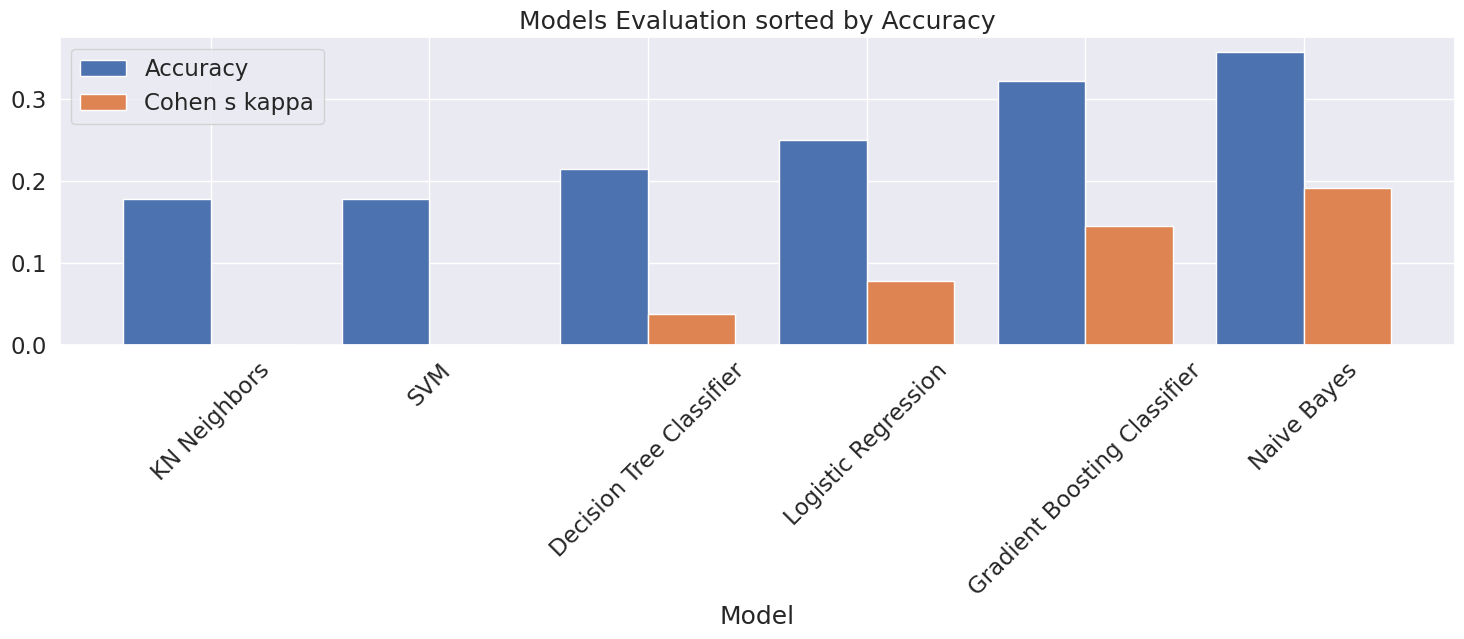

In [39]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'KN Neighbors': [accuracy_score(testLabels, modelResults_kn), cohen_kappa_score(testLabels, modelResults_kn)],
    'SVM': [accuracy_score(testLabels, modelResults_svm), cohen_kappa_score(testLabels, modelResults_svm)],
    'Decision Tree Classifier': [accuracy_score(testLabels, modelResults_clf), cohen_kappa_score(testLabels, modelResults_clf)],
    'Gradient Boosting Classifier': [accuracy_score(testLabels, modelResults_gbc), cohen_kappa_score(testLabels, modelResults_gbc)],
    'Logistic Regression': [accuracy_score(testLabels, modelResults_logreg), cohen_kappa_score(testLabels, modelResults_logreg)],
    'Naive Bayes': [accuracy_score(testLabels, modelResults_nb), cohen_kappa_score(testLabels, modelResults_nb)]
}

data = dict(sorted(data.items(), key=lambda item: item[1]))
names = list(data.keys())
accuracy_values = [x[0] for x in data.values()]
cohenskappa_values = [x[1] for x in data.values()]

plt.figure(figsize=(18,4))
X_axis = np.arange(len(names))
plt.bar(X_axis - 0.2, accuracy_values, 0.4, label='Accuracy')
plt.bar(X_axis + 0.2, cohenskappa_values, 0.4, label='Cohen s kappa')

plt.xticks(X_axis, names, rotation=45)
plt.xlabel("Model")
plt.title("Models Evaluation sorted by Accuracy")
plt.legend()
plt.show()

In [40]:
accuracy_values

[0.17857142857142858,
 0.17857142857142858,
 0.21428571428571427,
 0.25,
 0.32142857142857145,
 0.35714285714285715]

In [41]:
cohenskappa_values

[0.0,
 0.0,
 0.03749999999999998,
 0.07836990595611282,
 0.14469453376205788,
 0.1910112359550562]

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(testLabels, modelResults_nb)
print(classification_report(testLabels, modelResults_nb))
accuracy = accuracy_score(testLabels, modelResults_nb)
print("Accuracy: {:.2f}".format(accuracy))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels, modelResults_nb)))

              precision    recall  f1-score   support

        10.0       0.71      1.00      0.83         5
        68.0       0.24      0.83      0.37         6
       220.0       0.00      0.00      0.00         5
       819.0       0.00      0.00      0.00         6
      2200.0       0.00      0.00      0.00         6

    accuracy                           0.36        28
   macro avg       0.19      0.37      0.24        28
weighted avg       0.18      0.36      0.23        28

Accuracy: 0.36
Cohen's Kappa: 0.19


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


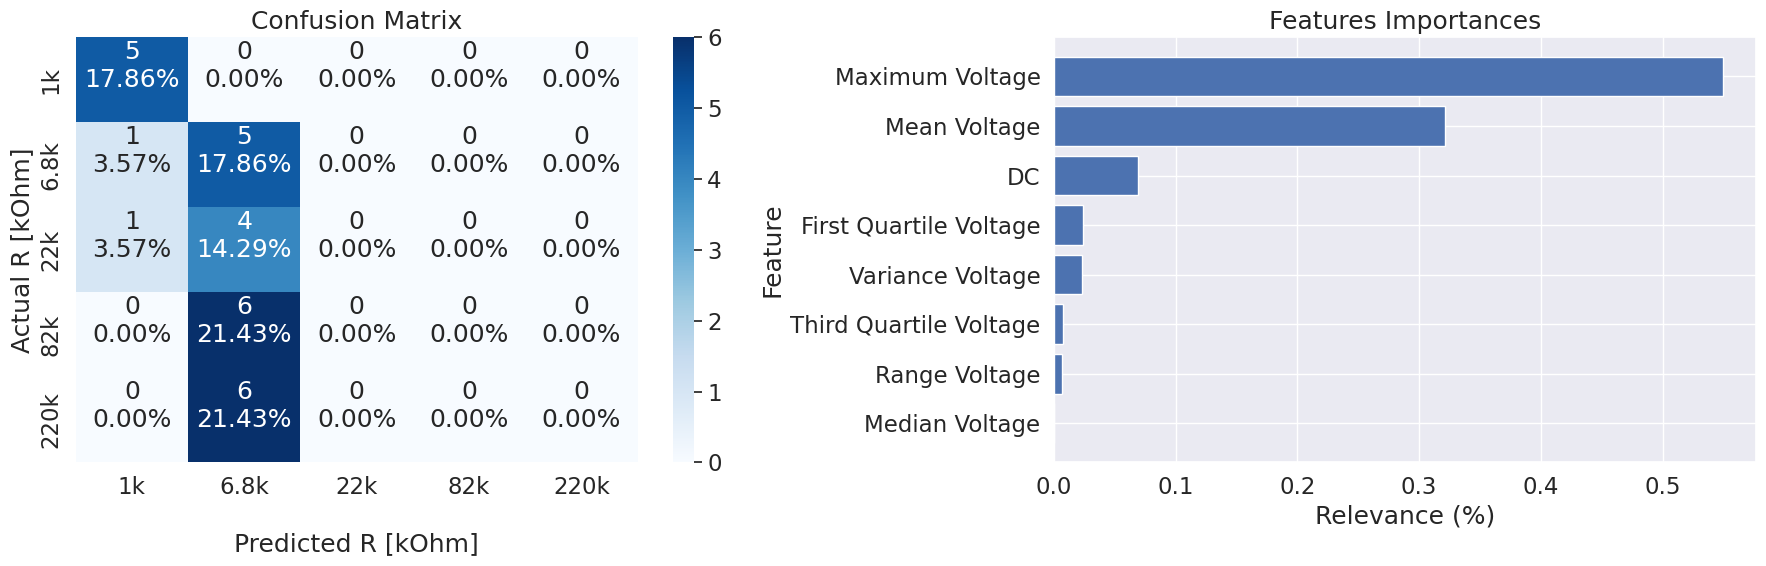

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost
from xgboost import XGBClassifier

# Your existing code...

# Assuming you have defined cf_matrix, trainLabels, trainSamples, and other necessary variables

# Set the figure size before creating subplots
plt.figure(figsize=(18, 6))

# Code for confusion matrix heatmap
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(5, 5)
sns.set(font_scale=1.5)  # Adjust to fit
ax1 = plt.subplot(1, 2, 1)  # Create subplot 1
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('\nPredicted R [kOhm]')
ax1.set_ylabel('Actual R [kOhm]')
ax1.xaxis.set_ticklabels(['1k', '6.8k', '22k', '82k', '220k'])
ax1.yaxis.set_ticklabels(['1k', '6.8k', '22k', '82k', '220k'])

# Code for feature importances
label_encoder = LabelEncoder()
trainLabels_encoded = label_encoder.fit_transform(trainLabels)
model = XGBClassifier()
model.fit(trainSamples, trainLabels_encoded)
features_importances = model.feature_importances_
features_dic = {
    'DC': features_importances[0],
    'Mean Voltage': features_importances[1],
    'Maximum Voltage': features_importances[2],
    'Range Voltage': features_importances[3],
    'Variance Voltage': features_importances[4],
    'Median Voltage': features_importances[5],
    'First Quartile Voltage': features_importances[6],
    'Third Quartile Voltage': features_importances[7]
}
features_dic = dict(sorted(features_dic.items(), key=lambda item: item[1], reverse=False))
names = list(features_dic.keys())
values = list(features_dic.values())
ax2 = plt.subplot(1, 2, 2)  # Create subplot 2
ax2.barh(names, values, align='center')
ax2.set_ylabel('Feature')
ax2.set_xlabel('Relevance (%)')
ax2.set_title("Features Importances")

plt.tight_layout()  # Adjust subplots to prevent overlap

# Save the figure as a PDF file
plt.savefig('cf_and_feat.pdf', format='pdf')

plt.show()
